In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

### Задание 1

In [2]:
data = pd.read_csv("train.csv")

Посмотрим на данные и проанализируем их.

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Категориальные признаки

Найдем категориальные признаки и заполним пустые значения.

In [5]:
cat_features = list(data.dtypes[data.dtypes == object].index)
data[cat_features] = data[cat_features].fillna("NaN")

Проверим наличие пустых значений.

In [6]:
data[cat_features].columns[data[cat_features].isnull().any()]

Index([], dtype='object')

In [7]:
data[cat_features].nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

Т.к. количество уникальных значений категориальных признаков невелико, то применим One-Hot Encoding.

In [8]:
for feature in data[cat_features]:
    dummies = pd.get_dummies(data[feature])
    dummies = dummies.add_prefix(f"{feature}_")
    data.drop(feature, axis = 1, inplace = True)
    data = data.join(dummies)

#### Числовае признаки

Найдем числовые признаки и заполним пустые значения.

In [9]:
num_features = list(data.dtypes[data.dtypes != object].index)
data[num_features] = data[num_features].fillna(-1)

Проверим наличие пустых значений.

In [10]:
data[num_features].columns[data[num_features].isnull().any()]

Index([], dtype='object')

#### Подготовка данных для тестирования

In [11]:
X = data.drop("SalePrice", axis = 1)
Y = data["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### Случайный лес

In [12]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

RandomForestRegressor()

In [13]:
print("Train Score:", round(random_forest.score(X_train, Y_train), 4))
print("Test Score:", round(random_forest.score(X_test, Y_test), 4))

Train Score: 0.9774
Test Score: 0.8883


Выведем важность признаков.

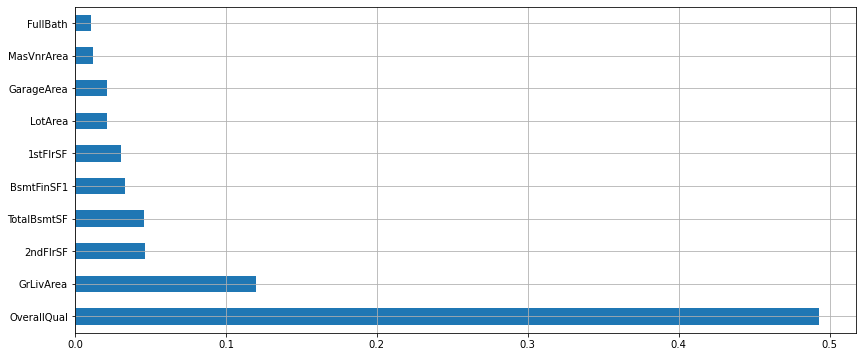

In [14]:
plt.figure(figsize = (14, 6))

data = (pd.Series(random_forest.feature_importances_, index = X.columns))
data.nlargest(10).plot(kind = "barh")

plt.grid()
plt.show()

#### Стекинг

In [15]:
estimators = [
    ("LinearRegression", LinearRegression()), 
    ("KNeighbors", KNeighborsRegressor()),
    ("DecisionTree", DecisionTreeRegressor())
]

stacking = StackingRegressor(estimators = estimators, final_estimator = RidgeCV())
stacking.fit(X_train, Y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighbors', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [16]:
for estimator in stacking.named_estimators_:
    print(f"{estimator} Score: {round(stacking.named_estimators_[estimator].score(X_test, Y_test), 4)}")

print("")
print("Stacking Train Score:", round(stacking.score(X_train, Y_train), 4))
print("Stacking Test Score:", round(stacking.score(X_test, Y_test), 4))

LinearRegression Score: 0.822
KNeighbors Score: 0.6363
DecisionTree Score: 0.6641

Stacking Train Score: 0.9603
Stacking Test Score: 0.8696


Как видим, метамодель показывает результат лучше, чем любая из базовых моделей. Тем не менее такой набор моделей стекинга проиграл случайному лесу.